<a href="https://colab.research.google.com/github/dygily1/Storage/blob/master/%EC%A0%95%EB%B3%B4%EA%B2%80%EC%83%89%EA%B8%B0%EC%88%A0_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8%E1%84%8C%E1%85%A1%E1%84%85%E1%85%AD02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습 목표

0. 환경설정
  - 필요 모듈 임포트
1. TF-IDF를 이용한 영화 검색 기술 개발 
  - 네이버 영화 줄거리 데이터 전처리
  - 줄거리 데이터를 이용한 TF-IDF 생성
  - TF-IDF를 이용한 영화 검색
2. PageRank를 이용한 영화 검색 기술 개발
  - 네이버 영화 링크 데이터 전처리
  - 영화 줄거리와 링크를 이용한 영화 검색
3. 과제 설명



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. 환경설정

In [ ]:
# 필요 라이브러리 다운로드
!pip install konlpy   # 형태소 분석기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 732 kB/s 
     |████████████████████████████████| 453 kB 77.6 MB/s 


In [ ]:
import pickle
import pandas as pd
import numpy as np
import heapq
import numpy
import re

from numpy import dot
from numpy.linalg import norm
from konlpy.tag import Okt
from tqdm import tqdm

# 1. TF-IDF

## 1.1 한국어 형태소 토크나이저 로드

In [ ]:
tokenizer = Okt()

In [ ]:
tokenizer.morphs('한국어영화줄거리데이터')

['한국어', '영화', '줄거리', '데이터']

## 1.2 한국어 영화 줄거리 데이터 전처리








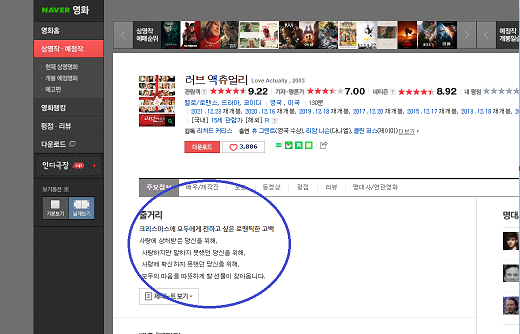

In [ ]:
# 데이터 로드
data = pd.read_excel('navermovie.xlsx')
data

,코드,제목,줄거리,한줄평
0,65923,라 비 앙 로즈,"1925년 프랑스, 10살 어린 소녀의 노래 소리가 사람들을 사로잡는다. 노래의 주...",1005
1,65953,미운 오리 새끼의 모험,이름마저 ‘어글리’인 세상에서 가장 못생긴 외모의 녀석이 태어나고 농장은 발칵 뒤집...,191
2,65963,기담,"경성 최고의 의료기술이 갖춰진 ‘안생병원’,동경 유학 중이던 엘리트 의사 부부 ‘인...",4060
3,65998,원스,이제 사랑은 더 이상 없을 거라고 믿었던 ‘그’삶을 위해 꿈을 포기했던 ‘그녀’더블...,6419
4,66026,로보캅,범죄와 무질서로 혼란에 빠진 도시.좋은 아빠이자 실력 있는 경찰로 평범하게 살아가던...,3610
...,...,...,...,...
2569,199393,조제,"할머니와 단둘이 사는 집, 그곳에서 책을 읽고 상상하며자신만의 세계를 살고 있는 ‘...",2425
2570,199406,미드나이트 스카이,"원인 불명의 재앙으로 종말을 맞이한 지구, 북극에 남겨진 과학자 오거스틴과 탐사를 ...",499
2571,199665,1984 최동원,"무쇠팔, 부산의 심장, 최고의 투수, 등번호 11번, 불꽃 투혼, 금테 안경우리가 ...",185
2572,199860,기적,오갈 수 있는 길은 기찻길밖에 없지만정작 기차역은 없는 마을.오늘부로 청와대에 딱 ...,6068


In [ ]:
#한글, 숫자, 영어 빼고 전부 제거
def sub_special(s):
  return re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]','',s)

for i, story in enumerate(tqdm(data['줄거리'])):
  data['줄거리'][i] = sub_special(str(story))

  0%|          | 0/2574 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 2574/2574 [00:00<00:00, 3542.46it/s]


In [ ]:
# 결과
data.head()

,코드,제목,줄거리,한줄평
0,65923,라 비 앙 로즈,1925년 프랑스 10살 어린 소녀의 노래 소리가 사람들을 사로잡는다 노래의 주인공...,1005
1,65953,미운 오리 새끼의 모험,이름마저 어글리인 세상에서 가장 못생긴 외모의 녀석이 태어나고 농장은 발칵 뒤집힌다...,191
2,65963,기담,경성 최고의 의료기술이 갖춰진 안생병원동경 유학 중이던 엘리트 의사 부부 인영김보경...,4060
3,65998,원스,이제 사랑은 더 이상 없을 거라고 믿었던 그삶을 위해 꿈을 포기했던 그녀더블린의 밤...,6419
4,66026,로보캅,범죄와 무질서로 혼란에 빠진 도시좋은 아빠이자 실력 있는 경찰로 평범하게 살아가던 ...,3610


In [ ]:
# 형태소 분석
for i, story in enumerate(tqdm(data['줄거리'])):
  # 형태소 분석기 사용 안할 시
  # data['줄거리'][i] = story.split(' ')
    data['줄거리'][i] = tokenizer.morphs(story)

  0%|          | 0/2574 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
100%|██████████| 2574/2574 [00:39<00:00, 65.32it/s] 


In [ ]:
# 결과
data.head()

,코드,제목,줄거리,한줄평
0,65923,라 비 앙 로즈,"[1925년, 프랑스, 10, 살, 어린, 소녀, 의, 노래, 소리, 가, 사람, ...",1005
1,65953,미운 오리 새끼의 모험,"[이름, 마저, 어글리, 인, 세상, 에서, 가장, 못, 생긴, 외모, 의, 녀석,...",191
2,65963,기담,"[경성, 최고, 의, 의료, 기술, 이, 갖춰진, 안생, 병원, 동경, 유학, 중,...",4060
3,65998,원스,"[이제, 사랑, 은, 더, 이상, 없을, 거, 라고, 믿었던, 그, 삶, 을, 위해...",6419
4,66026,로보캅,"[범죄, 와, 무질서, 로, 혼란, 에, 빠진, 도시, 좋은, 아빠, 이자, 실력,...",3610


## 1.3 Term-document Matrix
*   각 문서에서 용어의 등장 횟수



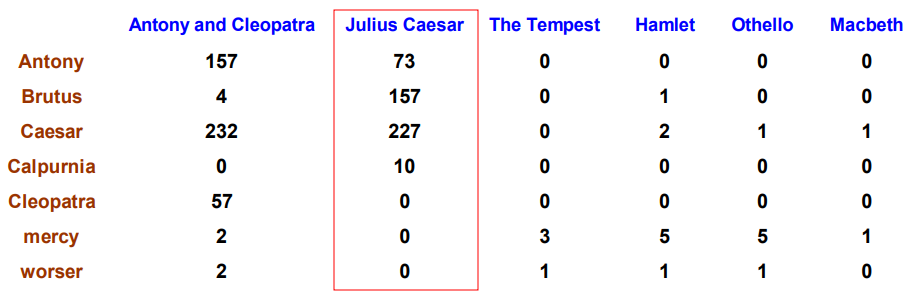

*   데이터의 Term-document matrix



In [ ]:
# terms_dic : 각 토큰의 빈도수 -> tf 계산 속도 향상을 위함
terms_dic = {}

for story in data['줄거리']:
  for term in story:
    if term not in terms_dic:
      terms_dic[term] = 1
    else:
      terms_dic[term] += 1

pd.DataFrame.from_dict(terms_dic, orient='index', columns=['빈도수'])

,빈도수
1925년,4
프랑스,56
10,53
살,376
어린,110
...,...
구라치,1
케이코,1
진피,1
팔손이,1


In [ ]:
# terms_list : 줄거리에 등장하는 모든 토큰 (형태소)
terms_list = list(terms_dic.keys())

print("전체 단어 개수 : ", len(terms_list))

전체 단어 개수 :  27993


In [ ]:
# story_dic : 각 영화에서 각 토큰의 빈도수

story_dic = {}
for i, story in enumerate(data['줄거리']):
  tmp = {}
  for term in story:
    if term not in tmp:
      tmp[term] = 1
    else:
      tmp[term] += 1
  story_dic[i] = tmp

print("영화 : ", data['제목'][0])
pd.DataFrame.from_dict(story_dic[0], orient='index', columns=['빈도수'])

영화 :  라 비 앙 로즈


,빈도수
1925년,1
프랑스,4
10,1
살,2
어린,1
...,...
접,1
절망,1
늪,1
빠지게,1


In [ ]:
# term_frequency 행렬

term_frequency = {}
for term in tqdm(terms_list):
  term_frequency[term] = []
  count_dic = {}
  for i in range(len(data['줄거리'])):
    if term not in story_dic[i]:
      count_dic[i] = 0
    else:
      count_dic[i] = story_dic[i][term]
  term_frequency[term] = list(count_dic.values())

term_frequency = pd.DataFrame(term_frequency, index=list(data['제목']))
term_frequency

100%|██████████| 27993/27993 [00:34<00:00, 805.81it/s]


,1925년,프랑스,10,살,어린,소녀,의,노래,소리,가,...,업유,명세,장학퀴즈,수학여행,쿠도,구라치,케이코,진피,팔손이,맞닿을
라 비 앙 로즈,1,4,1,2,1,1,15,5,1,2,...,0,0,0,0,0,0,0,0,0,0
미운 오리 새끼의 모험,0,0,0,0,0,0,6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
기담,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
원스,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
로보캅,0,0,0,0,0,0,5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
조제,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미드나이트 스카이,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1984 최동원,0,0,1,0,0,0,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0
기적,0,0,0,0,0,0,4,0,0,1,...,1,1,1,0,0,0,0,0,0,0


## 1.4  TF-IDF

*   tf(d,t)  (Term-frequency)     : 특정 문서 d에서 특정 단어 t의 등장 횟수
*   df(t)  (Document-frequency) : 특정 단어 t가 등장한 문서의 수
*   idf(d,t) (Inverse Document-frequency) : df(t)에 반비례


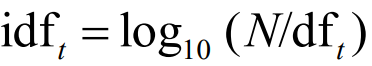

In [ ]:
# tf(d,t)
term_frequency

,1925년,프랑스,10,살,어린,소녀,의,노래,소리,가,...,업유,명세,장학퀴즈,수학여행,쿠도,구라치,케이코,진피,팔손이,맞닿을
라 비 앙 로즈,1,4,1,2,1,1,15,5,1,2,...,0,0,0,0,0,0,0,0,0,0
미운 오리 새끼의 모험,0,0,0,0,0,0,6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
기담,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
원스,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
로보캅,0,0,0,0,0,0,5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
조제,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미드나이트 스카이,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1984 최동원,0,0,1,0,0,0,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0
기적,0,0,0,0,0,0,4,0,0,1,...,1,1,1,0,0,0,0,0,0,0


In [ ]:
# df(t)
document_frequency = {}
for term in tqdm(term_frequency):
  document_frequency[term] = sum([1 for count in term_frequency[term] if count > 0])
  

27993it [00:10, 2789.70it/s]


In [ ]:
pd.DataFrame(document_frequency, index=['df'])

,1925년,프랑스,10,살,어린,소녀,의,노래,소리,가,...,업유,명세,장학퀴즈,수학여행,쿠도,구라치,케이코,진피,팔손이,맞닿을
df,4,43,51,322,101,196,2423,49,60,1703,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# 많은 문서에 등장하는 단어
pd.DataFrame(document_frequency, index=['df']).sort_values(by='df', axis=1, ascending =False)

,을,의,를,에,이,한,은,가,는,들,...,삿,든을,미치를,들어서는데,시스타,듀플,됐나요,니야,쟌,맞닿을
df,2430,2423,2115,2108,2075,1802,1716,1703,1678,1596,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# idf = log(n/df)

idf = {}
n = len(data)
for term in tqdm(document_frequency):
  idf[term] = np.log(n/document_frequency[term])

100%|██████████| 27993/27993 [00:00<00:00, 515345.44it/s]


In [ ]:
# idf가 낮은 단어 -> 많은 수의 문서에서 등장하는 단어

pd.DataFrame(idf, index=['idf']).sort_values(by='idf', axis=1, ascending =True)

,을,의,를,에,이,한,은,가,는,들,...,든을,미치를,들어서는데,시스타,듀플,됐나요,니야,쟌,부도덕한,맞닿을
idf,0.05757,0.060455,0.196406,0.199721,0.2155,0.356564,0.405465,0.41307,0.427859,0.477961,...,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216


In [ ]:
# idf가 높은 단어 -> 적은 수의 문서에서 등장하는 단어

pd.DataFrame(idf, index=['idf']).sort_values(by='idf', axis=1, ascending =False)

,손안,병태,뻗치게,거머쥐,쉐퍼,몬티,씰톰,배리,민항기,모시는,...,들,는,가,은,한,이,에,를,의,을
idf,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,7.853216,...,0.477961,0.427859,0.41307,0.405465,0.356564,0.2155,0.199721,0.196406,0.060455,0.05757


* TF-IDF weight

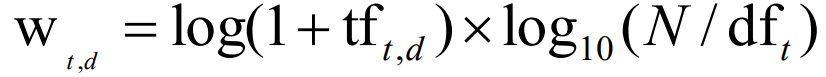

In [ ]:
term_frequency.loc['닥터 스트레인지'].values.shape

(27993,)

In [ ]:
idf_numpy = np.array(list(idf.values()))
idf_numpy.shape

(27993,)

In [ ]:
# TF-IDF 
tf_idf = {}
for idx, title in enumerate(tqdm(data['제목'])):
  new_tf = term_frequency.loc[title].values
  if new_tf.ndim != 1:
    new_tf = new_tf[0]
  tmp = np.log(new_tf + 1) * idf_numpy
  tf_idf[title] = tmp


100%|██████████| 2574/2574 [00:01<00:00, 1813.08it/s]


In [ ]:
# TF-IDF

pd.DataFrame(tf_idf, index=list(terms_list)).T

,1925년,프랑스,10,살,어린,소녀,의,노래,소리,가,...,업유,명세,장학퀴즈,수학여행,쿠도,구라치,케이코,진피,팔손이,맞닿을
라 비 앙 로즈,4.482529,6.585846,2.718101,2.283647,2.244477,1.784925,0.167616,7.097869,2.605451,0.453803,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
미운 오리 새끼의 모험,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117639,0.000000,0.000000,0.572636,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
기담,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066416,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
원스,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041904,0.000000,0.000000,0.286318,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
로보캅,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108320,0.000000,0.000000,0.572636,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
조제,0.000000,0.000000,0.000000,1.440821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
미드나이트 스카이,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041904,0.000000,0.000000,0.286318,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1984 최동원,0.000000,0.000000,2.718101,0.000000,0.000000,0.000000,0.083808,0.000000,0.000000,0.740122,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
기적,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097298,0.000000,0.000000,0.286318,...,5.443435,5.443435,5.443435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.5 TF-IDF 스코어를 활용한 영화 검색
* 검색어에 대한 문서의 TF-IDF 점수

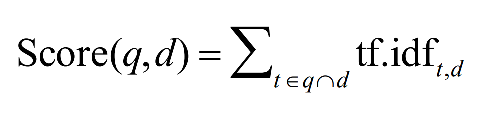

e.g) 
* 검색어 : '웃긴 주인공'
* TF-IDF 점수 : tf_idf[영화]['웃긴'] + tf_idf[영화]['주인공']

In [ ]:
def search_movie_with_score(query=""):
  score = {}
  for title in data['제목']:
    tmp = 0
    terms_in_query = tokenizer.morphs(query)
    for 단어 in terms_in_query:
      if 단어 not in terms_list:
        continue
      tmp += tf_idf[title][terms_list.index(단어)]
    if tmp != 0:
      score[title] = tmp

  score = sorted(score.items(), key=lambda x: x[1], reverse=True)
  score = {key:value for key,value in score}

  print("검색어 : ", query)
  for i, (key,value) in enumerate(score.items()):
    print(f'등수: {i+1} | 점수: {value:.3f} | 제목: {key}')
    if i == 10:
      break

In [ ]:
search_movie_with_score("마블 히어로 영화")

검색어 :  마블 히어로 영화
등수: 1 | 점수: 8.893 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수: 2 | 점수: 7.088 | 제목: 앤트맨
등수: 3 | 점수: 7.088 | 제목: 가디언즈 오브 갤럭시
등수: 4 | 점수: 7.088 | 제목: 이터널스
등수: 5 | 점수: 7.088 | 제목: 모비우스
등수: 6 | 점수: 6.820 | 제목: 극장판 도라에몽: 진구의 우주영웅기~스페이스 히어로즈~
등수: 7 | 점수: 6.614 | 제목: 지옥이 뭐가 나빠
등수: 8 | 점수: 6.614 | 제목: 일대일
등수: 9 | 점수: 6.172 | 제목: 나의 히어로 아카데미아 더 무비: 두 명의 히어로
등수: 10 | 점수: 6.090 | 제목: 옥희의 영화
등수: 11 | 점수: 6.090 | 제목: 오늘 밤, 로맨스 극장에서


In [ ]:
search_movie_with_score("우울할때 보면 힐링되는 영화")

검색어 :  우울할때 보면 힐링되는 영화
등수: 1 | 점수: 8.458 | 제목: 일대일
등수: 2 | 점수: 7.934 | 제목: 오늘 밤, 로맨스 극장에서
등수: 3 | 점수: 6.614 | 제목: 지옥이 뭐가 나빠
등수: 4 | 점수: 6.556 | 제목: 호빗 : 뜻밖의 여정
등수: 5 | 점수: 6.090 | 제목: 옥희의 영화
등수: 6 | 점수: 5.970 | 제목: 화이트 갓
등수: 7 | 점수: 5.578 | 제목: 남극의 쉐프
등수: 8 | 점수: 5.578 | 제목: 여배우는 너무해
등수: 9 | 점수: 5.531 | 제목: 제자, 옥한흠
등수: 10 | 점수: 5.531 | 제목: 오 마이 파파
등수: 11 | 점수: 5.470 | 제목: 암전


## 1.6 코사인 유사도 (Cosine similarity)
* 두 벡터 사이의 유사도

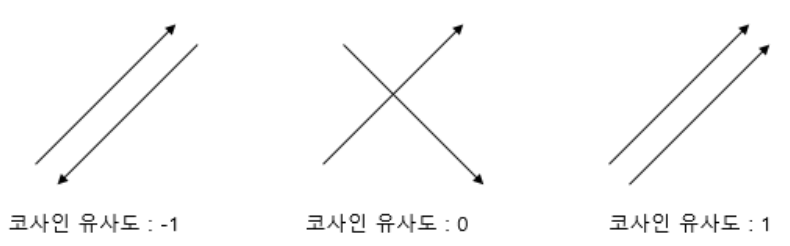

In [ ]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [ ]:
a = np.array([1,1])
b = np.array([1,-1])
sim = cos_sim(a, b)
print(f"{a}, {b} 코사인 유사도 : ", sim)

a = np.array([1,1])
b = np.array([3,3])
sim = cos_sim(a, b)
print(f"{a}, {b} 코사인 유사도 : ", sim)

[1 1], [ 1 -1] 코사인 유사도 :  0.0
[1 1], [3 3] 코사인 유사도 :  1.0


## 1.7 TF-IDF + 코사인 유사도를 이용한 영화 검색

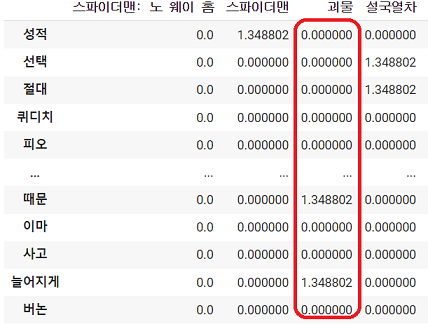

In [ ]:
# TF-IDF의 코사인 유사도를 이용한 영화 검색

def search_movie_with_similarity(query=""):
  print("검색어 : ", query)

  query = tokenizer.morphs(query)
  query_tf_idf = []

  for term in terms_list:
    query_tf_idf.append(query.count(term))

  # tf
  query_tf_idf = np.array(query_tf_idf)
  # tf-idf
  query_tf_idf = query_tf_idf * idf_numpy

  # 코사인 유사도 계산
  score = {}
  for title in data['제목']:
    score[title] = cos_sim(query_tf_idf, tf_idf[title])

  score = sorted(score.items(), key=lambda x: x[1], reverse=True)
  score = {key:value for key,value in score}

  for i, (key,value) in enumerate(score.items()):
    print(f'등수: {i+1} | 점수: {value:.3f} | 제목: {key}')
    if i == 10:
      break

In [ ]:
search_movie_with_similarity("마블 히어로 영화")

검색어 :  마블 히어로 영화
등수: 1 | 점수: 0.250 | 제목: 이터널스
등수: 2 | 점수: 0.218 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수: 3 | 점수: 0.180 | 제목: 어벤져스: 인피니티 워
등수: 4 | 점수: 0.164 | 제목: 나의 히어로 아카데미아 더 무비: 두 명의 히어로
등수: 5 | 점수: 0.148 | 제목: 모비우스
등수: 6 | 점수: 0.135 | 제목: 가디언즈 오브 갤럭시
등수: 7 | 점수: 0.128 | 제목: 앤트맨
등수: 8 | 점수: 0.117 | 제목: 극장판 도라에몽: 진구의 우주영웅기~스페이스 히어로즈~
등수: 9 | 점수: 0.101 | 제목: 샹치와 텐 링즈의 전설
등수: 10 | 점수: 0.092 | 제목: 암전
등수: 11 | 점수: 0.091 | 제목: 오늘 밤, 로맨스 극장에서


In [ ]:
search_movie_with_similarity("우울할때 보면 힐링되는 영화")

검색어 :  우울할때 보면 힐링되는 영화
등수: 1 | 점수: 0.136 | 제목: 빅 히어로
등수: 2 | 점수: 0.119 | 제목: 허삼관
등수: 3 | 점수: 0.105 | 제목: 데드풀
등수: 4 | 점수: 0.096 | 제목: 오늘 밤, 로맨스 극장에서
등수: 5 | 점수: 0.091 | 제목: 제네시스: 세상의 소금
등수: 6 | 점수: 0.089 | 제목: 데드풀 2
등수: 7 | 점수: 0.085 | 제목: 은지: 돌이킬 수 없는 그녀
등수: 8 | 점수: 0.082 | 제목: 세상의 끝에서 커피 한 잔
등수: 9 | 점수: 0.078 | 제목: 암전
등수: 10 | 점수: 0.077 | 제목: 행복까지 30일
등수: 11 | 점수: 0.076 | 제목: 퍼펙트 케어


# PageRank

## 2.1 간단한 PageRank 구현

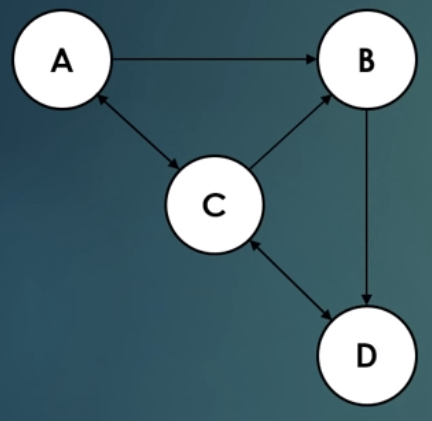

In [ ]:
N = 4
d = 0.85
R = np.array([1/N, 1/N, 1/N, 1/N])

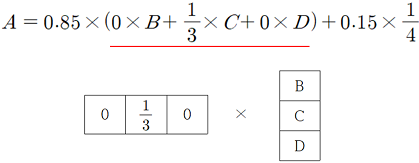

In [ ]:
# A: 2개 포인팅, B: 1개, C: 3개, D:1개
              # A    B    C    D
W = np.array([[0.0, 0.0, 1/3, 0.0],   # A
              [1/2, 0.0, 1/3, 0.0,],  # B
              [1/2, 0.0, 0.0, 1.0],   # C
              [0.0, 1.0, 1/3, 0.0,]]) # D

In [ ]:
print("R_0 : ", R)

R = np.matmul(W, R)*d + (1-d)/N # Random Sufer Model

print("R_1 : ", R)

R_0 :  [0.25 0.25 0.25 0.25]
R_1 :  [0.10833333 0.21458333 0.35625    0.32083333]


In [ ]:
# 수렴할때까지 반복
R = np.array([1/N, 1/N, 1/N, 1/N])

R_prev = R
print(f"R_0 : {R}")
for i in range(1001):
  if i ==1 or i == 5 or i == 10 or i == 100 or i ==1000:
    difference = sum(np.abs(R_prev - R))
    print(f"R_{i} : {R},  차이 : {difference}")
    R_prev = R
  R = np.matmul(W, R)*d + (1-d)/N

R_0 : [0.25 0.25 0.25 0.25]
R_1 : [0.10833333 0.21458333 0.35625    0.32083333],  차이 : 0.35416666666666663
R_5 : [0.13589997 0.19627655 0.3611598  0.30666368],  차이 : 0.06495287543402781
R_10 : [0.13875833 0.19764185 0.35692662 0.3066732 ],  차이 : 0.008466368221653142
R_100 : [0.13867253 0.19760835 0.3570795  0.30663962],  차이 : 0.00030577051676833333
R_1000 : [0.13867253 0.19760835 0.3570795  0.30663962],  차이 : 0.0


## 2.2 영화 링크 데이터를 이용한 PageRank

In [ ]:
# 영화-영화 그래프 생성
import pickle
import csv


with open("navermovie.pickle", "rb") as f:
  hyperlinks = pickle.load(f)
movie_titles = pd.read_excel('navermovie.xlsx')

nodes = {}
for hyperlink, title in zip(hyperlinks, movie_titles['제목']):
  nodes[title] = hyperlink

영화 = '어바웃 타임'
print(f"{영화} -> {nodes[영화]}")


어바웃 타임 -> ['미드나잇 인 파리', '노트북', '노팅 힐', '러브 액츄얼리', '알로하']


In [ ]:
# W 만들기

W = []
for 영화 in nodes.keys():
  w = []
  for 링크_영화 in nodes.keys():
    if 영화 == 링크_영화:
      w.append(0)
      continue
    elif 링크_영화 not in nodes:
      continue
    elif 영화 in nodes[링크_영화]:
      w.append(1/len(nodes[링크_영화]))
      continue
    else:
      w.append(0) 
  W.append(w)
W = np.array(W)

print(W.shape)

(2560, 2560)


In [ ]:
# 초기값 설정
N = len(nodes)
d = 0.85
R = np.array([1/N for i in range(N)])

In [ ]:
R_prev = R
for i in range(100):
  R_prev = R # 차이를 계산하기 위한 이전 값 저장 변수

  R = np.matmul(W, R)*d + (1-d)/N # 업데이트

  difference = sum(np.abs(R_prev - R)) # 차이
  print(f"반복 : {i+1}, 차이 : {difference}")

반복 : 1, 차이 : 0.8380302734375072
반복 : 2, 차이 : 0.21628997070312497
반복 : 3, 차이 : 0.07394256914062519
반복 : 4, 차이 : 0.03141955618750007
반복 : 5, 차이 : 0.014963462495585896
반복 : 6, 차이 : 0.00754942071174143
반복 : 7, 차이 : 0.003987001218099506
반복 : 8, 차이 : 0.002179265590713483
반복 : 9, 차이 : 0.0012230537944057343
반복 : 10, 차이 : 0.000703210227506136
반복 : 11, 차이 : 0.00041190446482005597
반복 : 12, 차이 : 0.0002452261225063004
반복 : 13, 차이 : 0.00014789984966277338
반복 : 14, 차이 : 9.021000497508495e-05
반복 : 15, 차이 : 5.554410203001132e-05
반복 : 16, 차이 : 3.4488019557400376e-05
반복 : 17, 차이 : 2.157250367527674e-05
반복 : 18, 차이 : 1.3585063037211301e-05
반복 : 19, 차이 : 8.607536266757367e-06
반복 : 20, 차이 : 5.4848316927223994e-06
반복 : 21, 차이 : 3.513369678686363e-06
반복 : 22, 차이 : 2.2615638492811465e-06
반복 : 23, 차이 : 1.4623967531785225e-06
반복 : 24, 차이 : 9.496394599471729e-07
반복 : 25, 차이 : 6.190930138163777e-07
반복 : 26, 차이 : 4.050731761150227e-07
반복 : 27, 차이 : 2.659322584668602e-07
반복 : 28, 차이 : 1.7512792071035135e-07
반복 : 29,

In [ ]:
print(R)

[5.85937500e-05 5.85937500e-05 1.06384932e-04 ... 1.00747870e-04
 6.85546875e-05 1.37800971e-04]


In [ ]:
# 랭크 상위 n개의 영화
# ranking_movie : 각 영화의 순위
# score_movie : 각 영화의 점수

top = 10
ranking_index = R.argsort()[-len(R):][::-1]
ranking_movie = {}
score_movie = {}
movie_list = movie_titles['제목']
for rank, index in enumerate(ranking_index):
  ranking_movie[movie_list[index]] = rank + 1
  score_movie[movie_list[index]] = R[index]

for idx, (movie, score) in enumerate(score_movie.items()):
  print(f"PageRank 점수 : {score:.6f}, 영화 : {movie}")
  if idx == top:
    break

PageRank 점수 : 0.003828, 영화 : 장마
PageRank 점수 : 0.003813, 영화 : 사냥
PageRank 점수 : 0.003362, 영화 : 블루 아워
PageRank 점수 : 0.003073, 영화 : 매혹당한 사람들
PageRank 점수 : 0.002315, 영화 : 토이 스토리 4
PageRank 점수 : 0.001037, 영화 : 미녀와 야수
PageRank 점수 : 0.001971, 영화 : 주토피아
PageRank 점수 : 0.001496, 영화 : 올드보이
PageRank 점수 : 0.001420, 영화 : 골든슬럼버
PageRank 점수 : 0.001223, 영화 : 애나벨 집으로
PageRank 점수 : 0.001177, 영화 : 캡틴 마블


## 2.3 TF-IDF + PageRank 영화 검색

In [ ]:
# 1. TF-IDF 랭킹
query = '마블 히어로 영화'
score = {}
for title in data['제목']:
  tmp = 0
  terms_in_query = tokenizer.morphs(query)
  for 단어 in terms_in_query:
    if 단어 not in terms_list:
      continue
    tmp += tf_idf[title][terms_list.index(단어)]
  if tmp != 0:
    score[title] = tmp

score = sorted(score.items(), key=lambda x: x[1], reverse=True)
score = {key:value for key,value in score}

for i, (key,value) in enumerate(score.items()):
  print(f'등수 : {i+1} | 점수: {value:.3f} | 제목: {key}')
  if i == 10:
    break

print("\n\n")
# 2. PageRank 랭킹
for i, (key,value) in enumerate(score.items()):
  print(f'등수 : {ranking_movie[key]} | PageRank 점수: {score_movie[key]:.8f} | 제목: {key}')
  if i == 10:
    break



등수 : 1 | 점수: 8.893 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수 : 2 | 점수: 7.088 | 제목: 앤트맨
등수 : 3 | 점수: 7.088 | 제목: 가디언즈 오브 갤럭시
등수 : 4 | 점수: 7.088 | 제목: 이터널스
등수 : 5 | 점수: 7.088 | 제목: 모비우스
등수 : 6 | 점수: 6.820 | 제목: 극장판 도라에몽: 진구의 우주영웅기~스페이스 히어로즈~
등수 : 7 | 점수: 6.614 | 제목: 지옥이 뭐가 나빠
등수 : 8 | 점수: 6.614 | 제목: 일대일
등수 : 9 | 점수: 6.172 | 제목: 나의 히어로 아카데미아 더 무비: 두 명의 히어로
등수 : 10 | 점수: 6.090 | 제목: 옥희의 영화
등수 : 11 | 점수: 6.090 | 제목: 오늘 밤, 로맨스 극장에서



등수 : 2220 | PageRank 점수: 0.00005859 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수 : 1074 | PageRank 점수: 0.00007059 | 제목: 앤트맨
등수 : 170 | PageRank 점수: 0.00020904 | 제목: 가디언즈 오브 갤럭시
등수 : 1801 | PageRank 점수: 0.00005859 | 제목: 이터널스
등수 : 1694 | PageRank 점수: 0.00005859 | 제목: 모비우스
등수 : 1963 | PageRank 점수: 0.00005859 | 제목: 극장판 도라에몽: 진구의 우주영웅기~스페이스 히어로즈~
등수 : 709 | PageRank 점수: 0.00008302 | 제목: 지옥이 뭐가 나빠
등수 : 549 | PageRank 점수: 0.00009255 | 제목: 일대일
등수 : 1393 | PageRank 점수: 0.00005859 | 제목: 나의 히어로 아카데미아 더 무비: 두 명의 히어로
등수 : 1758 | PageRank 점수: 0.00005859 | 제목: 옥희의 영화
등수 : 5

In [ ]:
#  TF-IDF  + PageRank 검색
def metric(a, b):
  return a * b


def search_movie_with_score_pagerank(query=""):
  print("검색어 : ", query)

  score = {}
  for title in data['제목']:
    tmp = 0
    terms_in_query = tokenizer.morphs(query)

    for 단어 in terms_in_query:
      if 단어 not in terms_list:
        continue
      tmp += tf_idf[title][terms_list.index(단어)]

    if tmp != 0:
      score[title] = tmp

  score = sorted(score.items(), key=lambda x: x[1], reverse=True)
  score = {key:value for key,value in score}


  # ranking_movie[key] -> TF-IDF * PageRank 순위
  ranking_dic = {}
  for i, (key,value) in enumerate(score.items()):
    if i == 20: break # 상위 20개 검색 결과만 re-ranking
    tfidf_score = value
    if key in score_movie:
      pagerank = score_movie[key]
      ranking_dic[key] = metric(tfidf_score, pagerank)

  ranking_dic = sorted(ranking_dic.items(), key=lambda x: x[1], reverse=True)
  ranking_dic = {key:value for key,value in ranking_dic}

  for i, (key,value) in enumerate(ranking_dic.items()):
    print(f'등수: {i+1} | 점수: {value*1000:.3f} | 제목: {key}')
    if i == 10:
      break


In [ ]:
search_movie_with_score_pagerank('마블 히어로 영화')

검색어 :  마블 히어로 영화
등수: 1 | 점수: 3.267 | 제목: 어벤져스: 인피니티 워
등수: 2 | 점수: 1.482 | 제목: 가디언즈 오브 갤럭시
등수: 3 | 점수: 1.292 | 제목: 킹스맨 : 시크릿 에이전트
등수: 4 | 점수: 0.612 | 제목: 일대일
등수: 5 | 점수: 0.576 | 제목: 오늘 밤, 로맨스 극장에서
등수: 6 | 점수: 0.549 | 제목: 지옥이 뭐가 나빠
등수: 7 | 점수: 0.521 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수: 8 | 점수: 0.500 | 제목: 앤트맨
등수: 9 | 점수: 0.415 | 제목: 이터널스
등수: 10 | 점수: 0.415 | 제목: 모비우스
등수: 11 | 점수: 0.400 | 제목: 극장판 도라에몽: 진구의 우주영웅기~스페이스 히어로즈~


In [ ]:
search_movie_with_score_pagerank('우울할때 보면 힐링되는')

검색어 :  우울할때 보면 힐링되는
등수: 1 | 점수: 0.516 | 제목: 제자, 옥한흠
등수: 2 | 점수: 0.441 | 제목: 쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?
등수: 3 | 점수: 0.414 | 제목: 뺑반
등수: 4 | 점수: 0.382 | 제목: 엄마의 공책
등수: 5 | 점수: 0.345 | 제목: 신이 말하는 대로
등수: 6 | 점수: 0.324 | 제목: 오 마이 파파
등수: 7 | 점수: 0.321 | 제목: 빅 히어로
등수: 8 | 점수: 0.307 | 제목: 행복까지 30일
등수: 9 | 점수: 0.292 | 제목: 나쁜 이웃들
등수: 10 | 점수: 0.286 | 제목: 잡식가족의 딜레마
등수: 11 | 점수: 0.286 | 제목: 자전차왕 엄복동


## 2.4 TF-IDF + 코사인 유사도 + PageRank 영화 검색

In [ ]:
def search_movie_with_similarity_pagerank(query=""):
  print("검색어 : ", query)

  query = tokenizer.morphs(query)
  query_tf_idf = []

  for term in terms_list:
    query_tf_idf.append(query.count(term))

  # tf
  query_tf_idf = np.array(query_tf_idf)
  # tf-idf
  query_tf_idf = query_tf_idf * idf_numpy

  # 코사인 유사도 계산
  score = {}
  for title in data['제목']:
    score[title] = cos_sim(query_tf_idf, tf_idf[title])

  score = sorted(score.items(), key=lambda x: x[1], reverse=True)
  score = {key:value for key,value in score}

  # ranking_movie[key] -> TF-IDF * PageRank 순위
  ranking_dic = {}
  for i, (key,value) in enumerate(score.items()):
    if i == 20: break # 상위 20개 검색 결과만 re-ranking
    tfidf_score = value
    if key in score_movie:
      pagerank = score_movie[key]
      ranking_dic[key] = metric(tfidf_score, pagerank)

  ranking_dic = sorted(ranking_dic.items(), key=lambda x: x[1], reverse=True)
  ranking_dic = {key:value for key,value in ranking_dic}

  for i, (key,value) in enumerate(ranking_dic.items()):
    print(f'등수: {i+1} | 점수: {value*1000:.3f} | 제목: {key}')
    if i == 10:
      break

In [ ]:
search_movie_with_similarity_pagerank('마블 히어로 영화')

검색어 :  마블 히어로 영화
등수: 1 | 점수: 0.147 | 제목: 어벤져스: 인피니티 워
등수: 2 | 점수: 0.028 | 제목: 가디언즈 오브 갤럭시
등수: 3 | 점수: 0.015 | 제목: 이터널스
등수: 4 | 점수: 0.013 | 제목: 극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드
등수: 5 | 점수: 0.010 | 제목: 블랙 팬서
등수: 6 | 점수: 0.010 | 제목: 결혼 이야기
등수: 7 | 점수: 0.010 | 제목: 나의 히어로 아카데미아 더 무비: 두 명의 히어로
등수: 8 | 점수: 0.009 | 제목: 앤트맨
등수: 9 | 점수: 0.009 | 제목: 모비우스
등수: 10 | 점수: 0.009 | 제목: 오늘 밤, 로맨스 극장에서
등수: 11 | 점수: 0.007 | 제목: 극장판 파워레인저 트레인포스VS 다이노포스 THE MOVIE


In [ ]:
search_movie_with_similarity_pagerank('우울할때 보면 힐링되는')

검색어 :  우울할때 보면 힐링되는
등수: 1 | 점수: 0.011 | 제목: 빅 히어로
등수: 2 | 점수: 0.008 | 제목: 데드풀
등수: 3 | 점수: 0.008 | 제목: 허삼관
등수: 4 | 점수: 0.007 | 제목: 왓 이프
등수: 5 | 점수: 0.007 | 제목: 인간중독
등수: 6 | 점수: 0.006 | 제목: 행복까지 30일
등수: 7 | 점수: 0.006 | 제목: 쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?
등수: 8 | 점수: 0.006 | 제목: 제네시스: 세상의 소금
등수: 9 | 점수: 0.006 | 제목: 데드풀 2
등수: 10 | 점수: 0.006 | 제목: 저수지 게임
등수: 11 | 점수: 0.005 | 제목: 은지: 돌이킬 수 없는 그녀


# 과제

실습자료02.ipynb 의 코드와 제공된 데이터를 이용하여,

TF-IDF 영화 검색기,  TF-IDF + PageRank 영화 검색기 실행

총 4가지 검색기에 대해 3가지 검색어 검색 후 평가 (e.g. 올바른 검색 결과 나옴)

실습자료02.ipynb를 학번_이름_02.ipynb로 수정하여 

블랙보드 과제란 제출

기한: 10월 22일 (토) 23:59

담당자 : 박현태 조교 (pht0639@korea.ac.kr), 김성호 조교 (sungho3268@korea.ac.kr)




## TF-IDF

In [ ]:
search_movie_with_score("아무 생각 없이 볼 수 있는 영화") # 평가예시: 원하는 검색 결과 나옴 / 안나옴

검색어 :  아무 생각 없이 볼 수 있는 영화
등수: 1 | 점수: 13.277 | 제목: 일대일
등수: 2 | 점수: 12.392 | 제목: 호빗 : 뜻밖의 여정
등수: 3 | 점수: 11.111 | 제목: 탐욕의 제국
등수: 4 | 점수: 10.490 | 제목: 지옥이 뭐가 나빠
등수: 5 | 점수: 9.722 | 제목: 북 오브 러브
등수: 6 | 점수: 9.149 | 제목: 그놈이다
등수: 7 | 점수: 8.399 | 제목: 오늘 밤, 로맨스 극장에서
등수: 8 | 점수: 8.372 | 제목: 신촌좀비만화
등수: 9 | 점수: 7.870 | 제목: 암전
등수: 10 | 점수: 7.615 | 제목: 그 사람 그 사랑 그 세상
등수: 11 | 점수: 7.599 | 제목: 남극의 쉐프


In [ ]:
search_movie_with_score("")

In [ ]:
search_movie_with_score("")

## TF-IDF + 코사인 유사도

In [ ]:
search_movie_with_similarity("") # 평가예시: 위 결과보다 더 정확한 결과가 나옴

In [ ]:
search_movie_with_similarity("")

In [ ]:
search_movie_with_similarity("")

## TF-IDF + PageRank

In [ ]:
search_movie_with_score_pagerank("") # 평가예시: 너무 비슷한 영화가 매번 나옴

In [ ]:
search_movie_with_score_pagerank("")

In [ ]:
search_movie_with_score_pagerank("")

## TF-IDF + 코사인 유사도 + PageRank

In [ ]:
search_movie_with_similarity_pagerank("") # 평가예시: 상위 몇번째까지는 상당히 정확도가 높은 검색결과가 나옴

In [ ]:
search_movie_with_similarity_pagerank("")

In [ ]:
search_movie_with_similarity_pagerank("")